In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy 
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [243]:
df=pd.read_csv("HR_analytics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [244]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [245]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [246]:
#higher number of  yes is present, we should stratify the data during the evaluation period
df["Attrition"].value_counts()



No     1233
Yes     237
Name: Attrition, dtype: int64

In [247]:
df["BusinessTravel"].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [248]:
df["Department"].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [249]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [250]:
#data there is no null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [251]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


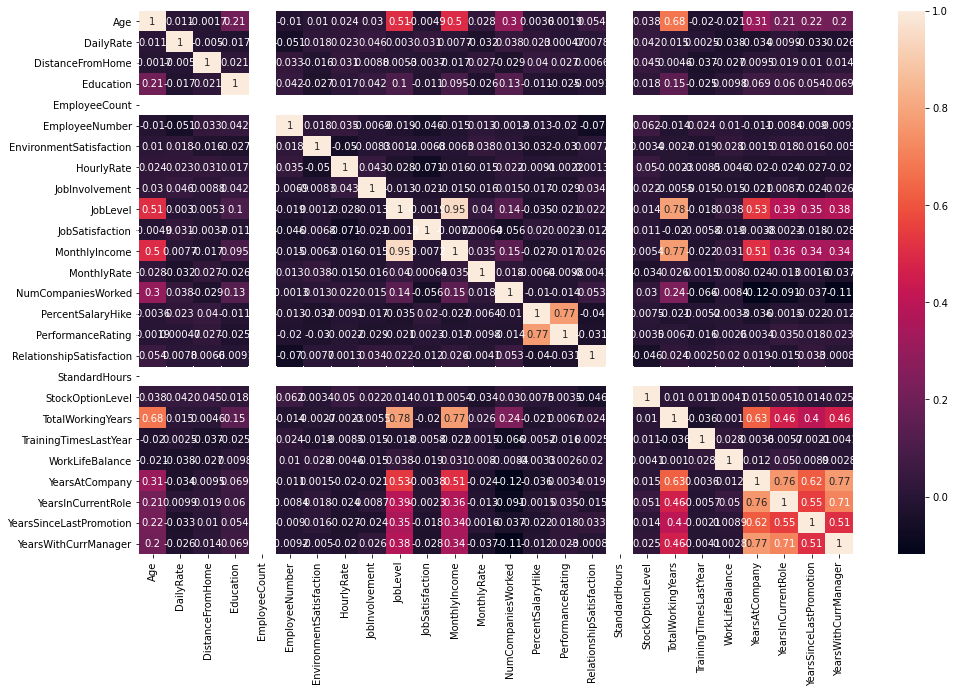

In [252]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [253]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


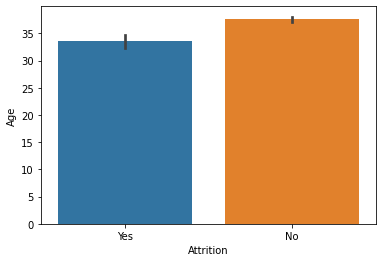

In [254]:
#lets see the relation bw age and attrition rate
sns.barplot(x="Attrition",y="Age",data=df)
#we can see that young people bw the age of 30 to 35 are having more attrition wherever people above 35 are less prone to attrition

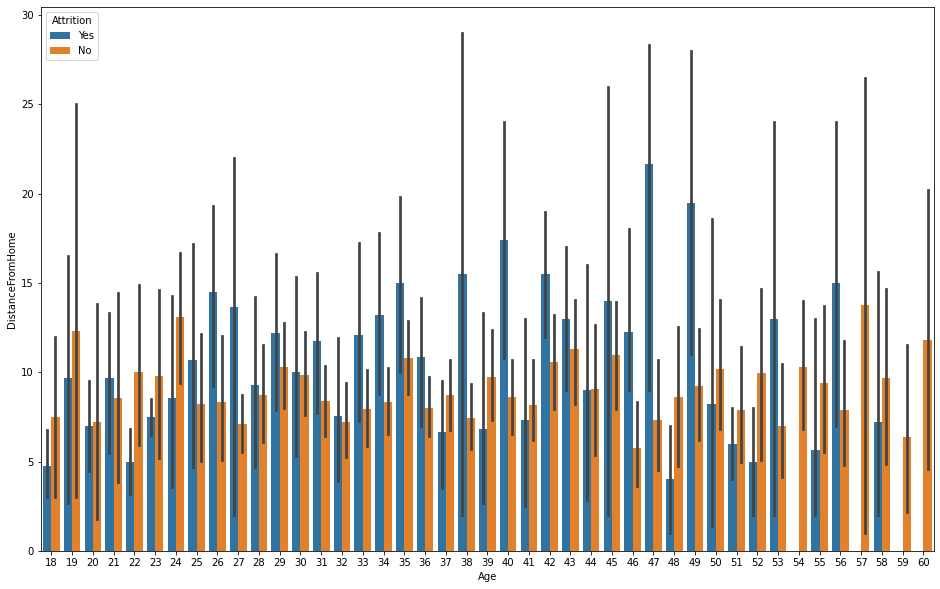

In [255]:
#people above the age of 26 also those who have distance from home is grater then 10km have high attrition
plt.figure(figsize=(16,10))
sns.barplot(x="Age",y="DistanceFromHome",hue="Attrition",data=df)

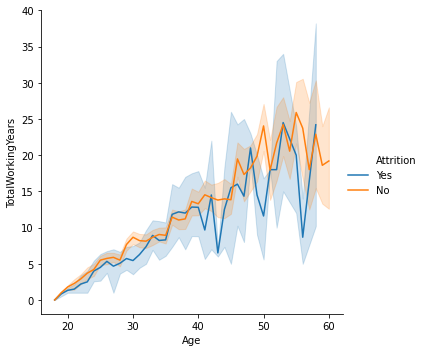

In [256]:
#people with higher age have high experiennce and less people say yes to attrition
sns.relplot(x="Age",y="TotalWorkingYears",hue="Attrition",kind="line",data=df)


In [257]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]
for i in list1:
    df[i]=le.fit_transform(df[i])
    


In [258]:
df.shape

(1470, 35)

In [259]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [278]:
from sklearn.decomposition import PCA
x=df.drop("Attrition",axis=1)
y=df["Attrition"]
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)

In [279]:
xpca

array([[ 5.13914400e+03, -7.18086191e+02, -1.04761813e+03, ...,
        -2.05675390e+00, -3.90356201e+00, -3.04254248e+00],
       [ 1.05288651e+04, -1.80265343e+03, -1.00488338e+03, ...,
        -3.64587128e-02,  8.33380254e+00, -5.52134255e+00],
       [-1.20894259e+04, -3.92014549e+03, -1.04800022e+03, ...,
        -6.54691374e+00, -7.04741665e-01,  2.26531379e+00],
       ...,
       [-9.14394285e+03,  9.82508866e+00,  1.08728383e+03, ...,
         5.75218312e-01,  5.19642814e+00,  6.94087819e-01],
       [-1.11396696e+03, -1.07021632e+03,  1.02378689e+03, ...,
         6.18716797e-01, -1.05808685e+00, -1.08483575e-01],
       [-4.16598741e+03, -1.93266726e+03,  1.05263455e+03, ...,
        -2.00139106e+00, -2.98557749e+00, -1.24580084e+00]])

In [280]:
x=xpca

In [281]:
x=pd.DataFrame(data=x)

In [282]:
x

,0,1,2,3,4,5,6,7,8,9
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056754,-3.903562,-3.042542
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333803,-5.521343
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546914,-0.704742,2.265314
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627868,-4.249575,-0.734053
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019277,-3.540199,3.531493
...,...,...,...,...,...,...,...,...,...,...
1465,-2181.024559,-3848.070666,1023.712248,-143.499755,26.296613,9.316218,12.645107,-1.124814,0.592061,9.018470
1466,7281.771483,3191.212196,1044.998665,115.413126,24.497951,-4.114278,-3.080194,-1.207130,0.505122,-4.488765
1467,-9143.942850,9.825089,1087.283833,598.828898,-19.997605,-11.819731,-4.055396,0.575218,5.196428,0.694088
1468,-1113.966963,-1070.216317,1023.786886,-282.395082,4.443784,14.364611,-9.443836,0.618717,-1.058087,-0.108484


In [283]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [285]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=89,stratify=y)

In [308]:
#checking the best random state
max_r2=0
for rand in range(1,90):
    x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=rand)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r2:
        max_r2=r2_scr
        best_state=rand
print("max r2 score",max_r2,"random",rand)

max r2 score 0 random 89


In [296]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
MNB=MultinomialNB
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [297]:
model1=[]
model1.append(("KNeighborsClassifier",KNN))
model1.append(("SVC",SV))
model1.append(("DecisionTreeClassifier",DT))
model1.append(("logistic regression",LR))
model1.append(("AdaBoostClassifier",ABC))
model1.append(("GradientBoostingClassifier",GBC))
model1.append(("RandomForestClassifier",RFC))


********************* KNeighborsClassifier ************


KNeighborsClassifier()


accuracy scoore =  0.8253968253968254


cross validation scr = 0.8217687074829932




classification report               precision    recall  f1-score   support

           0       0.84      0.98      0.90       370
           1       0.25      0.04      0.07        71

    accuracy                           0.83       441
   macro avg       0.55      0.51      0.49       441
weighted avg       0.75      0.83      0.77       441



[[361   9]
 [ 68   3]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
********************* SVC ************


SVC()


accuracy scoore =  0.8390022675736961


cross validation scr = 0.8387755102040817




classification report               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50    

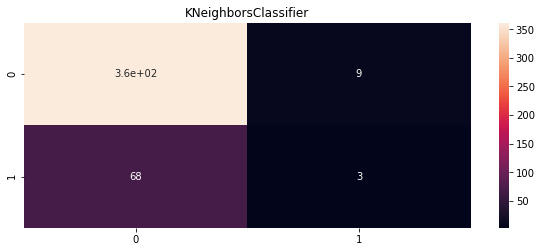

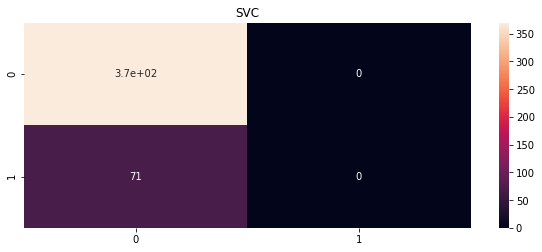

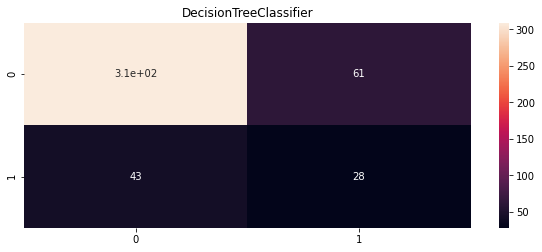

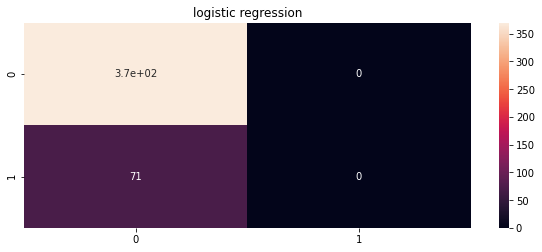

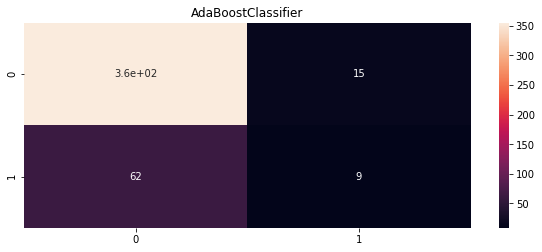

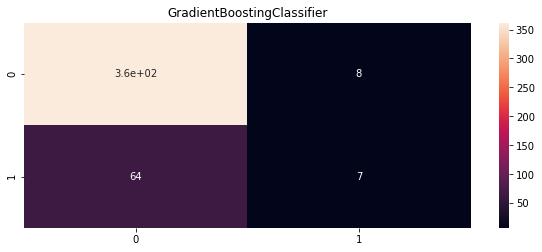

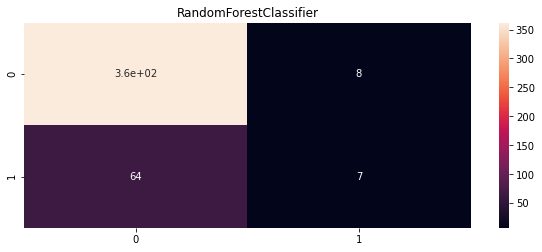

In [301]:
model2=[]
score=[]
cvs=[]
rocscore=[]
for name,md in model1:
    print("*********************",name,"************")
    print("\n")
    model2.append(name)
    md.fit(x_train,y_train)
    print(md)
    y_pred=md.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,y_pred)
    score.append(AS*100)
    print("accuracy scoore = ",AS)
    print("\n")
    sc=cross_val_score(md,X,y,cv=10,scoring="accuracy").mean()
    print("cross validation scr =", sc)
    cvs.append(sc*100)
    print("\n")
    
    print("\n")
    print("classification report",classification_report(y_test,y_pred))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))


In [ ]:
#svm and loisticregression gives the best accuracy score of 84 percent 

In [ ]:
df.skew()

In [ ]:
df.hist(figsize=(16,10),bins=15)